# Bird Migration Stage Classification

Dataset Overview :-

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Egrets & Herons_2years.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31236\8430287.py:1: DtypeWarning: Columns (7,10,12,20,21,30,34,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Egrets & Herons_2years.csv")


In [6]:
print("Sample data:")
print(df.head(10))

Sample data:
      event-id  visible                timestamp  location-long  location-lat   
0  18930842246     True  2021-06-03 01:00:41.000     -81.067289     35.236764  \
1  18937830505     True  2021-06-04 01:00:23.000     -81.063947     35.240904   
2  18943795764     True  2021-06-04 20:00:23.000     -81.067315     35.236775   
3  18943795765     True  2021-06-04 20:00:34.000     -81.067281     35.236703   
4  18945063991     True  2021-06-04 23:40:23.000     -81.062632     35.240693   
5  18945063992     True  2021-06-05 00:00:07.000     -81.062604     35.240666   
6  18945063993     True  2021-06-05 00:20:08.000     -81.064625     35.240518   
7  18945063994     True  2021-06-05 00:40:07.000     -81.064416     35.240571   
8  18945063995     True  2021-06-05 01:00:19.000     -81.064538     35.240976   
9  18950724330     True  2021-06-05 20:00:23.000     -81.067339     35.236732   

   algorithm-marked-outlier  bar:barometric-pressure comments   
0                       NaN   

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659861 entries, 0 to 659860
Data columns (total 49 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   event-id                                       659861 non-null  int64  
 1   visible                                        659861 non-null  bool   
 2   timestamp                                      659861 non-null  object 
 3   location-long                                  251930 non-null  float64
 4   location-lat                                   251930 non-null  float64
 5   algorithm-marked-outlier                       0 non-null       float64
 6   bar:barometric-pressure                        81147 non-null   float64
 7   comments                                       52129 non-null   object 
 8   compass-heading                                0 non-null       float64
 9   data-decoding-software               

In [8]:
print("\nMissing Values (Top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))


Missing Values (Top 20):
mag:magnetic-field-raw-y        659861
orientation:quaternion-raw-z    659861
orientation:quaternion-raw-y    659861
orientation:quaternion-raw-x    659861
algorithm-marked-outlier        659861
compass-heading                 659861
orientation:quaternion-raw-w    659861
manually-marked-outlier         659861
mag:magnetic-field-raw-z        659861
mag:magnetic-field-raw-x        659861
eobs:activity                   657015
eobs:activity-samples           657015
habitat                         656391
comments                        607732
height-above-msl                581733
gps:hdop                        581733
tag-voltage                     581733
gps:fix-type                    581733
gps:dop                         578830
gps:satellite-count             578830
dtype: int64


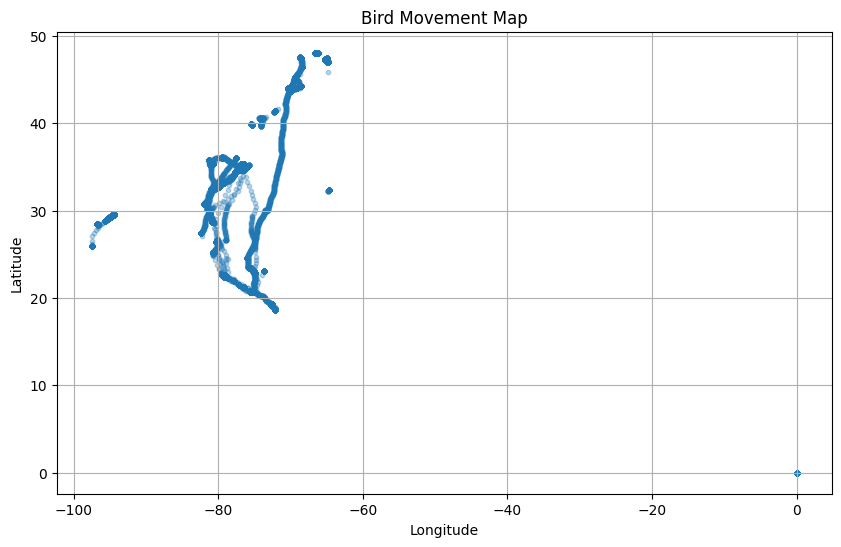

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], alpha=0.3, s=10)
plt.title("Bird Movement Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

Data Preprocessing :- 

In [25]:
df = df.rename(columns={
    'location-long': 'lon',
    'location-lat': 'lat',
    'timestamp': 'Datetime',
    'individual-local-identifier': 'bird_id'
})

In [17]:
df = df.dropna(subset=['lon', 'lat'])

In [29]:
df = df.rename(columns={'time': 'datetime'})

In [30]:
df.head()

,event_id,visible,datetime,lon,lat,algorithm-marked-outlier,bar:barometric-pressure,comments,compass-heading,data-decoding-software,...,orientation:quaternion-raw-w,orientation:quaternion-raw-x,orientation:quaternion-raw-y,orientation:quaternion-raw-z,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,bird_id,study-name
0,18930842246,True,NaT,-81.067289,35.236764,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ardea herodias,3260,Warren,Egrets & Herons
1,18937830505,True,NaT,-81.063947,35.240904,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ardea herodias,3260,Warren,Egrets & Herons
2,18943795764,True,NaT,-81.067315,35.236775,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ardea herodias,3260,Warren,Egrets & Herons
3,18943795765,True,NaT,-81.067281,35.236703,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ardea herodias,3260,Warren,Egrets & Herons
4,18945063991,True,NaT,-81.062632,35.240693,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ardea herodias,3260,Warren,Egrets & Herons


In [31]:
# Parse datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [32]:
# Sort by bird and time
df = df.sort_values(by=['bird_id', 'datetime']).reset_index(drop=True)

In [33]:
df.head(10)

,event_id,visible,datetime,lon,lat,algorithm-marked-outlier,bar:barometric-pressure,comments,compass-heading,data-decoding-software,...,orientation:quaternion-raw-w,orientation:quaternion-raw-x,orientation:quaternion-raw-y,orientation:quaternion-raw-z,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,bird_id,study-name
0,18933775183,True,NaT,-76.337868,34.861996,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.07,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
1,18933775184,True,NaT,-76.337883,34.861984,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
2,18933775185,True,NaT,-76.337799,34.861595,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
3,18933775186,True,NaT,-76.337868,34.861469,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
4,18933775187,True,NaT,-76.337860,34.861462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
5,18933775188,True,NaT,-76.337852,34.861488,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.05,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
6,18933775189,True,NaT,-76.337746,34.861546,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
7,18933775190,True,NaT,-76.337784,34.861546,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
8,18933775191,True,NaT,-76.337791,34.861412,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons
9,18933775192,True,NaT,-76.337822,34.861443,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.05,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251930 entries, 0 to 251929
Data columns (total 49 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   event_id                                       251930 non-null  int64         
 1   visible                                        251930 non-null  bool          
 2   datetime                                       0 non-null       datetime64[ns]
 3   lon                                            251930 non-null  float64       
 4   lat                                            251930 non-null  float64       
 5   algorithm-marked-outlier                       0 non-null       float64       
 6   bar:barometric-pressure                        81031 non-null   float64       
 7   comments                                       52129 non-null   object        
 8   compass-heading                             

In [38]:
[df.columns[i] for i in range(len(df.columns)) if 'time' in df.columns[i].lower()]


['datetime', 'eobs:start-timestamp', 'eobs:used-time-to-get-fix']

In [39]:
# Assume data collection began at 2023-01-01 00:00:00
reference_time = pd.Timestamp('2023-01-01 00:00:00')

In [40]:
# Convert to timedelta (handles mm:ss.ms)
df['time_offset'] = pd.to_timedelta(df['eobs:start-timestamp'], errors='coerce')


In [41]:
df['synthetic_datetime'] = reference_time + df['time_offset']


In [42]:
df = df.sort_values('synthetic_datetime').reset_index(drop=True)


In [43]:
df.head(5)

,event_id,visible,datetime,lon,lat,algorithm-marked-outlier,bar:barometric-pressure,comments,compass-heading,data-decoding-software,...,orientation:quaternion-raw-y,orientation:quaternion-raw-z,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,bird_id,study-name,time_offset,synthetic_datetime
0,18933775183,True,NaT,-76.337868,34.861996,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.07,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons,NaT,NaT
1,18933775184,True,NaT,-76.337883,34.861984,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons,NaT,NaT
2,18933775185,True,NaT,-76.337799,34.861595,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons,NaT,NaT
3,18933775186,True,NaT,-76.337868,34.861469,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons,NaT,NaT
4,18933775187,True,NaT,-76.337860,34.861462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.06,gps,Egretta thula,NC Sneg 43254,#1457855766,Egrets & Herons,NaT,NaT


In [63]:
print(df['bird_id'].unique())


['#1457855766' 'CTT 254 NC Sneg 1' 'Carl' 'Cee Cee' 'Cornelia' 'Edward'
 'Harper' 'Mariner' 'New Dump GREG1' 'Norman 3' 'Ragged Richard'
 'SNEG1 42512 Texas 2' 'SNEG2 42694 Texas 1' 'Warren' 'WichitaGreg']


In [73]:
df.to_csv('migrationfile.csv', index=False)

In [79]:
df['eobs:start-timestamp'].dropna().unique()[:10]


array(['2021-06-03 00:00:00.000', '2021-06-03 01:00:00.000',
       '2021-06-03 02:00:00.000', '2021-06-03 03:00:00.000',
       '2021-06-03 04:00:00.000', '2021-06-03 05:00:00.000',
       '2021-06-03 06:00:00.000', '2021-06-03 07:00:00.000',
       '2021-06-03 08:00:00.000', '2021-06-03 09:00:00.000'], dtype=object)

In [87]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
from datetime import timedelta

start_datetime = pd.to_datetime("2021-06-03 00:00:00")
interval_seconds = 5  # change if sampling rate is different

df['synthetic_datetime'] = [start_datetime + timedelta(seconds=i * interval_seconds) for i in range(len(df))]


In [92]:
df[['synthetic_datetime', 'lon', 'lat']].head(10)


,synthetic_datetime,lon,lat
0,2021-06-03 00:00:00,-76.337868,34.861996
1,2021-06-03 00:00:05,-76.337883,34.861984
2,2021-06-03 00:00:10,-76.337799,34.861595
3,2021-06-03 00:00:15,-76.337868,34.861469
4,2021-06-03 00:00:20,-76.337860,34.861462
5,2021-06-03 00:00:25,-76.337852,34.861488
6,2021-06-03 00:00:30,-76.337746,34.861546
7,2021-06-03 00:00:35,-76.337784,34.861546
8,2021-06-03 00:00:40,-76.337791,34.861412
9,2021-06-03 00:00:45,-76.337822,34.861443


In [97]:
#speed
from geopy.distance import geodesic

# Shift coordinates and time
df['prev_lat'] = df['lat'].shift(1)
df['prev_lon'] = df['lon'].shift(1)
df['prev_time'] = df['synthetic_datetime'].shift(1)

# Define speed function
def compute_speed(row):
    try:
        # Skip if previous data is missing
        if pd.isna(row['prev_lat']) or pd.isna(row['prev_lon']) or pd.isna(row['prev_time']):
            return None
        # Distance in km
        dist = geodesic((row['prev_lat'], row['prev_lon']), (row['lat'], row['lon'])).km
        # Time difference in hours
        time_diff = (row['synthetic_datetime'] - row['prev_time']).total_seconds() / 3600
        # Avoid division by zero
        if time_diff == 0:
            return 0
        return dist / time_diff
    except:
        return None

# Apply speed calculation
df['speed_kmh'] = df.apply(compute_speed, axis=1)


In [98]:
def classify_stage(speed):
    if pd.isna(speed):
        return 'unknown'
    elif speed < 1:
        return 'resting'
    elif speed < 5:
        return 'foraging'
    else:
        return 'migrating'

df['migration_stage'] = df['speed_kmh'].apply(classify_stage)


In [99]:
df[['synthetic_datetime', 'lat', 'lon', 'speed_kmh', 'migration_stage']].head(10)


,synthetic_datetime,lat,lon,speed_kmh,migration_stage
0,2021-06-03 00:00:00,34.861996,-76.337868,NaN,unknown
1,2021-06-03 00:00:05,34.861984,-76.337883,1.376232,foraging
2,2021-06-03 00:00:10,34.861595,-76.337799,31.559862,migrating
3,2021-06-03 00:00:15,34.861469,-76.337868,11.042072,migrating
4,2021-06-03 00:00:20,34.861462,-76.337860,0.768142,resting
5,2021-06-03 00:00:25,34.861488,-76.337852,2.142510,foraging
6,2021-06-03 00:00:30,34.861546,-76.337746,8.376554,migrating
7,2021-06-03 00:00:35,34.861546,-76.337784,2.501844,foraging
8,2021-06-03 00:00:40,34.861412,-76.337791,10.713220,migrating
9,2021-06-03 00:00:45,34.861443,-76.337822,3.208872,foraging


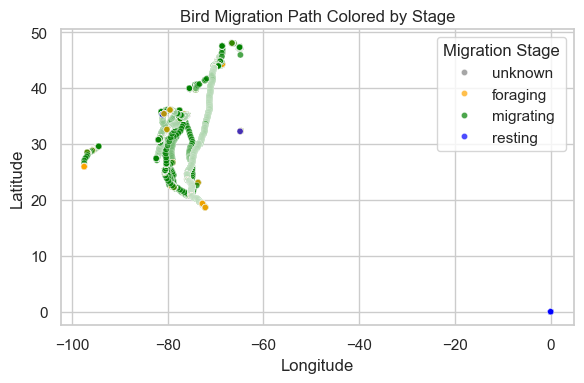

In [104]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Drop rows with missing coordinates or stages
df_map = df.dropna(subset=['lat', 'lon', 'migration_stage'])

# Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_map,
    x='lon', y='lat',
    hue='migration_stage',
    palette={'resting': 'blue', 'foraging': 'orange', 'migrating': 'green', 'unknown': 'gray'},
    alpha=0.7,
    s=20
)
plt.title('Bird Migration Path Colored by Stage')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Migration Stage')
plt.tight_layout()
plt.show()


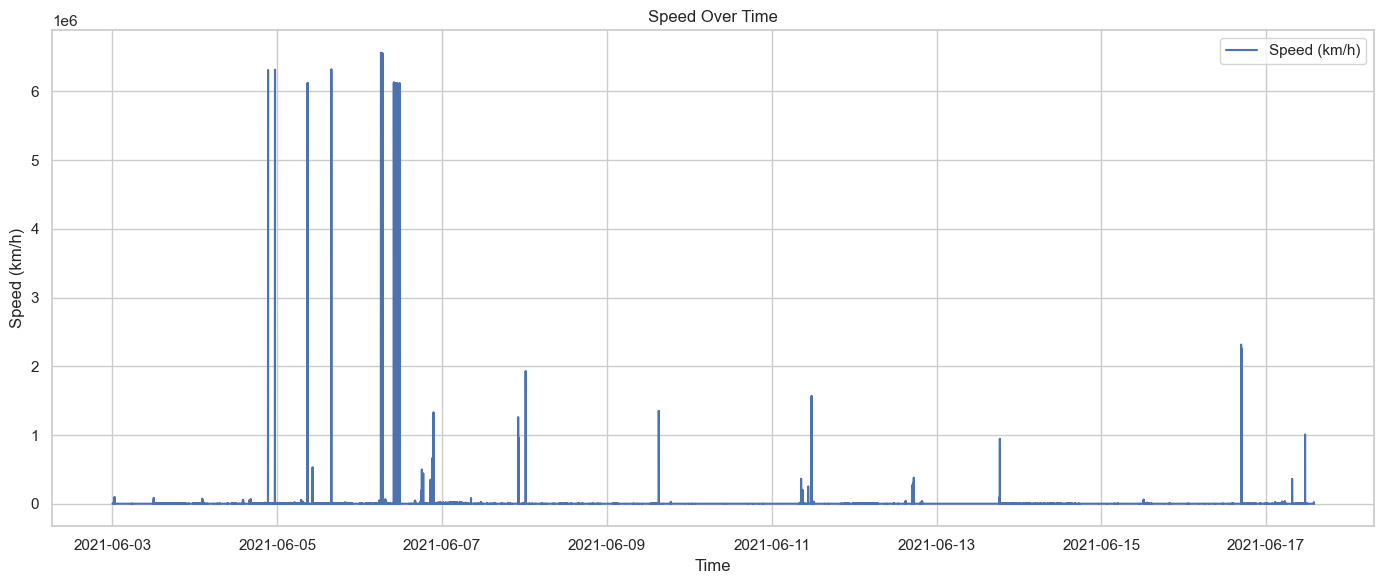

In [107]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='synthetic_datetime', y='speed_kmh', label='Speed (km/h)')
plt.title('Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31236\4230169905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='migration_stage', order=['resting', 'foraging', 'migrating', 'unknown'],


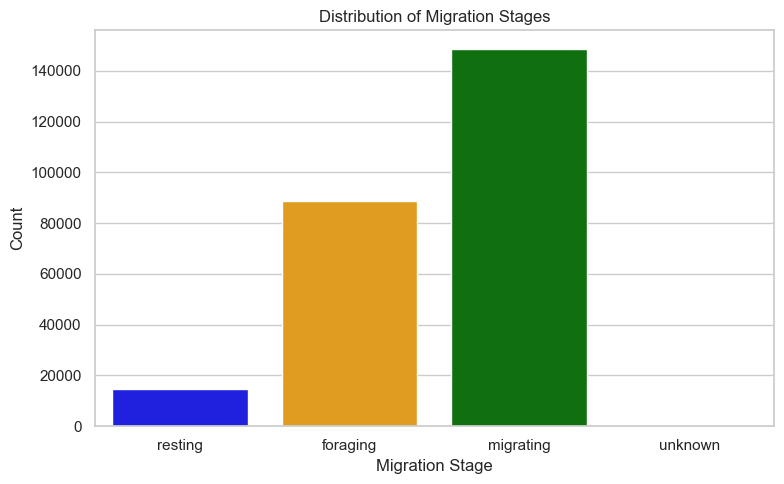

In [108]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='migration_stage', order=['resting', 'foraging', 'migrating', 'unknown'],
              palette={'resting': 'blue', 'foraging': 'orange', 'migrating': 'green', 'unknown': 'gray'})
plt.title('Distribution of Migration Stages')
plt.xlabel('Migration Stage')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Feature engineering :-

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df['hour_of_day'] = df['synthetic_datetime'].dt.hour #extracting feature 
df['day_of_year'] = df['synthetic_datetime'].dt.dayofyear

features = ['lon','lat','hour_of_day','day_of_year','speed_kmh']
df_model = df[features + ['migration_stage']].dropna()

le = LabelEncoder()
df_model['migration_stage_encoded'] = le.fit_transform(df_model['migration_stage'])




Splitting data for training :-

In [111]:
x = df_model[features]
y = df_model['migration_stage_encoded']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)



Model training :-

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators = 100, random_state=42)
clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

Predict :-

In [115]:
y_pred = clf.predict(x_test)

Evaluation :-

In [116]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

    foraging       1.00      1.00      1.00     17582
   migrating       1.00      1.00      1.00     29865
     resting       1.00      1.00      1.00      2939

    accuracy                           1.00     50386
   macro avg       1.00      1.00      1.00     50386
weighted avg       1.00      1.00      1.00     50386



In [117]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

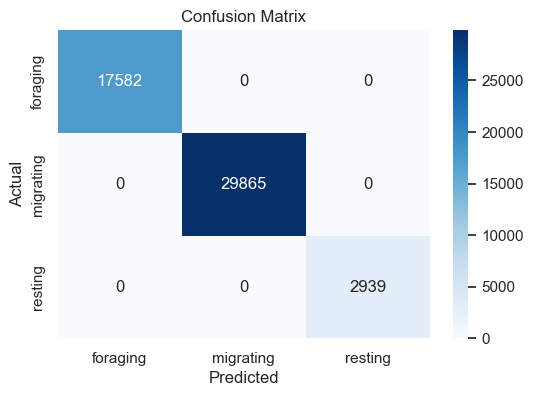

In [120]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Saving Model :-

In [122]:
import joblib

# Save model and label encoder
joblib.dump(clf, 'migration_stage_model.joblib')
joblib.dump(le, 'label_encoder.joblib')


['label_encoder.joblib']